<a href="https://colab.research.google.com/github/chancey922/Yolov5_gun-sword-detect/blob/main/Yolov5%2Bwandb_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 环境准备
### YOLOv5配置

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%ls

Cloning into 'yolov5'...
remote: Enumerating objects: 7722, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 7722 (delta 278), reused 338 (delta 239), pack-reused 7280
Receiving objects: 100% (7722/7722), 9.36 MiB | 28.04 MiB/s, done.
Resolving deltas: 100% (5295/5295), done.
drive/  sample_data/  yolov5/


In [2]:
# install packages
%cd yolov5
!pip install -r requirements.txt
!pip install wandb

/content/yolov5
     |████████████████████████████████| 645kB 8.4MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.8MB 8.2MB/s 
     |████████████████████████████████| 174kB 42.6MB/s 
     |████████████████████████████████| 133kB 49.4MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=576c69954c7190b8a9e23b1284c64f3b856c0fe1992f7cb7f3e16fc6e2445380
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=44b326c11875218eaaa0877017df595708b74d0eec1fa03028f8fc67b02d4065
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Suc

In [3]:
#查看torch版本和gpu
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


好耶！是tesla T4，很不错。据[官网](https://cloud.google.com/blog/products/ai-machine-learning/nvidia-tesla-t4-gpus-now-available-in-beta)显示，只有几个地区匹配的是T4。我这里用的是东京的ip。

In [4]:
#使用官方数据进行测试
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

100% 14.1M/14.1M [00:00<00:00, 37.2MB/s]

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/2 /content/yolov5/d

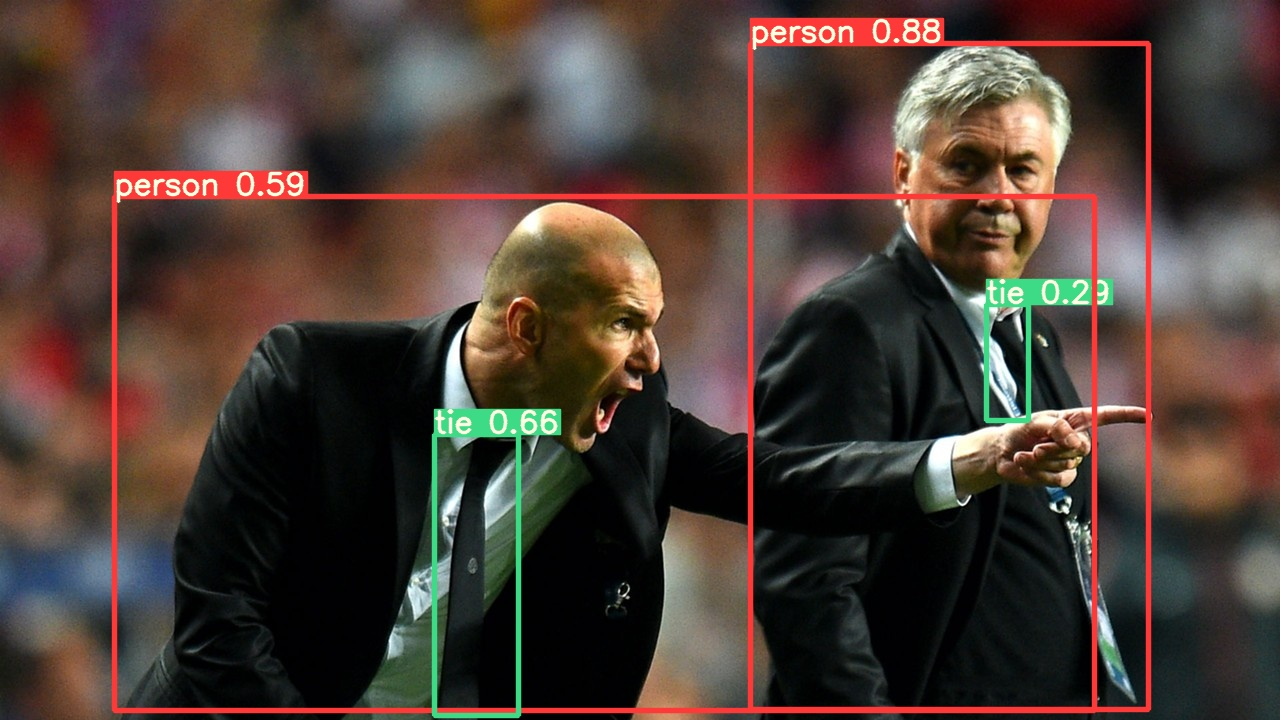

In [5]:
#需要注意路径，一般而言每运行一次都会新建一个exp
Image(filename='runs/detect/exp/zidane.jpg', width=600)

看起来yolov5成功运行了

## 加载数据
这里直接使用挂载云盘的数据集，也可以采用curl下载或者git clone，有不同的形式

In [6]:
!unzip -uq /content/drive/MyDrive/Yolov5_gw-detct_colab/Yolov5_gw_dataset.zip -d Yolov5_gw_dataset 
#现在是在yolov5文件夹内，所以直接解压到当前文件夹

## 训练模型

In [7]:
!python train.py \
  --img 640 \
  --batch 16  \
  --epochs 500  \
  --data /content/drive/MyDrive/Yolov5_gw-detct_colab/gw_data.yaml \
  --weights yolov5s.pt  \
  --project Yolo-wandb-gw-detect \
  --upload_dataset \
  --save_period 50 \
  --cache 

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Yolov5_gw-detct_colab/gw_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=Yolo-wandb-gw-detect, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=True, bbox_interval=-1, save_period=50, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

参数说明：
* --epochs：迭代轮次，这里设置为500
* --batch-size：硬件不好的话，把16改为8或者4甚至更低（yolov5支持更小，这里白嫖的是colab的tesla T4，就直接16了）
* --weights：可以不加载预训练模型，这里改成无，当然也可以加载，这里使用yolov5s，具体模型选取看yolov5官方仓库的数据
* `--upload_dataset`：wandb中的参数，在模型训练时将数据集作为DSViz表上传wandb，后续可以云端分享和读取
* If the dataset is logged in you W&B dasboard, you get training progress artifacts which compares the predictions from each epoch with their ground truths（如果数据集记录在你的W&B数据板上，你会得到训练进度工件，它将每个历元的预测与它们的基本事实进行比较）
* `--save_preiod` sets the number of epochs to wait before logging the model checkpoints as artifacts. If not set, only the final trained model is logged（设置在将模型检查点记录为工件之前要等待的时代数。如果未设置，则只记录最终训练的模型）



### 暂存任务
* You can resume runs from the last logged checkpoint in your project dashboard( Enable this by setting `--save_period` to appropriate value). 
* If you've also logged the dataset( enable this by setting `--upload_datset` or use upload dataset script), you can resume runs on any device as you don't need the dataset stored locally anymore.

To resume a crashed or interrupted run:
* Go to that run's overview section on W&B dashboard
* Copy the run path 

In [ ]:
!python train.py --resume wandb-artifact://{insert run path of crashed run}

## 可视化

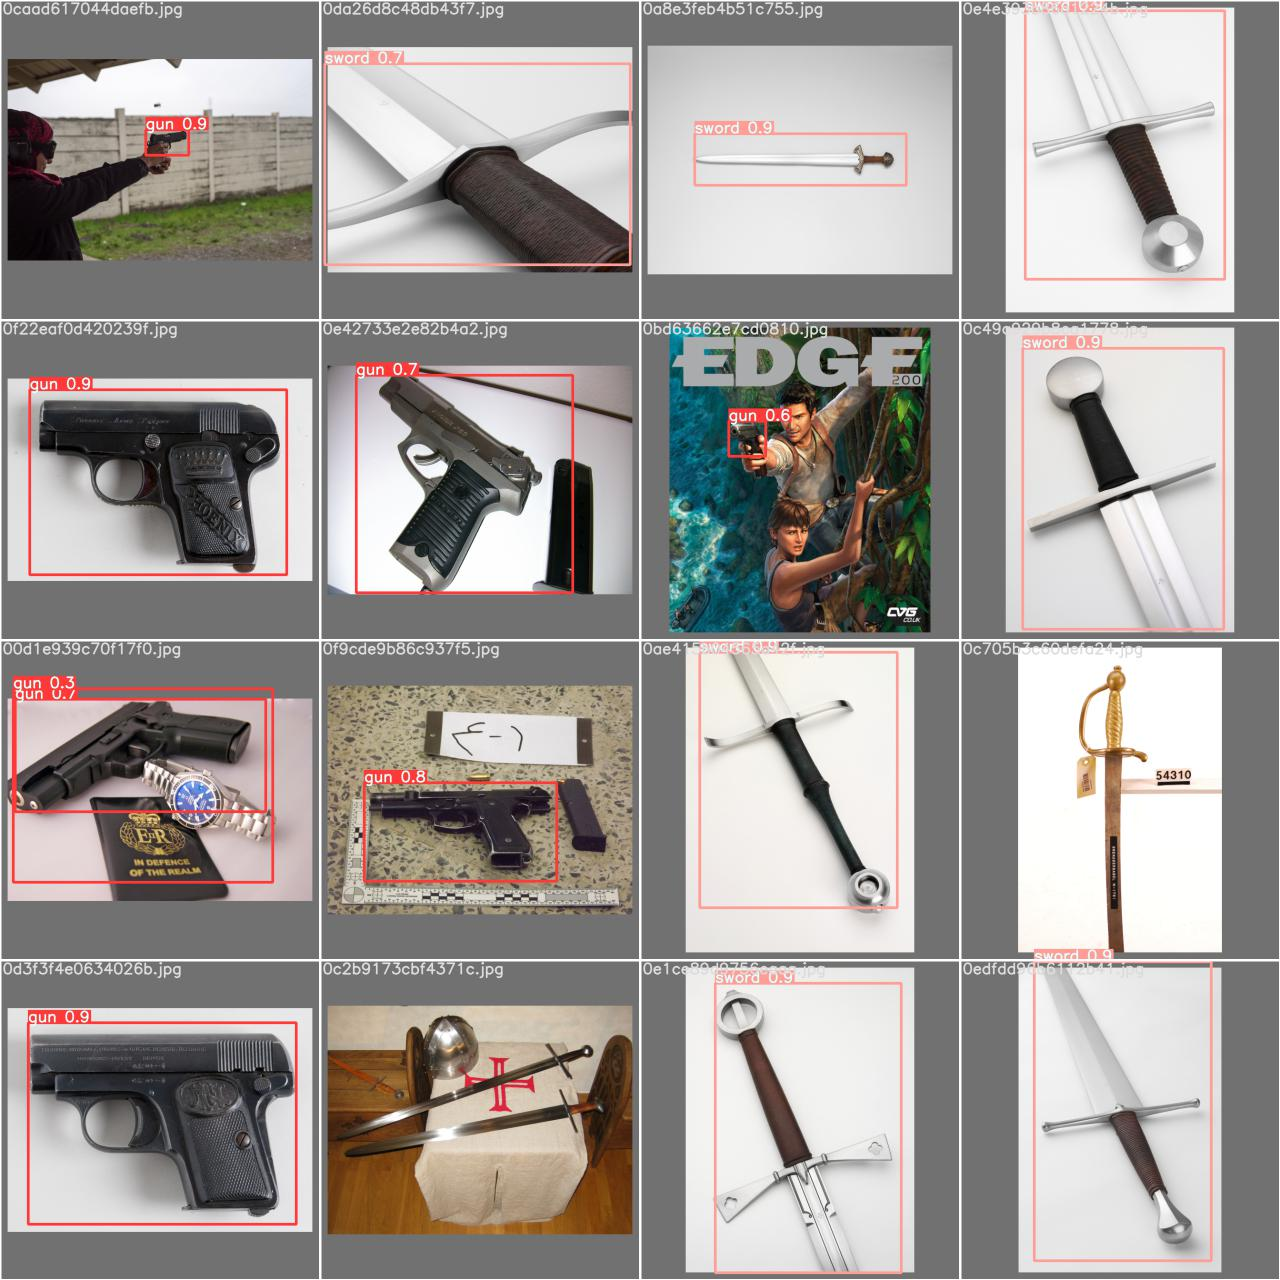

In [8]:
Image(filename='Yolo-wandb-gw-detect/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

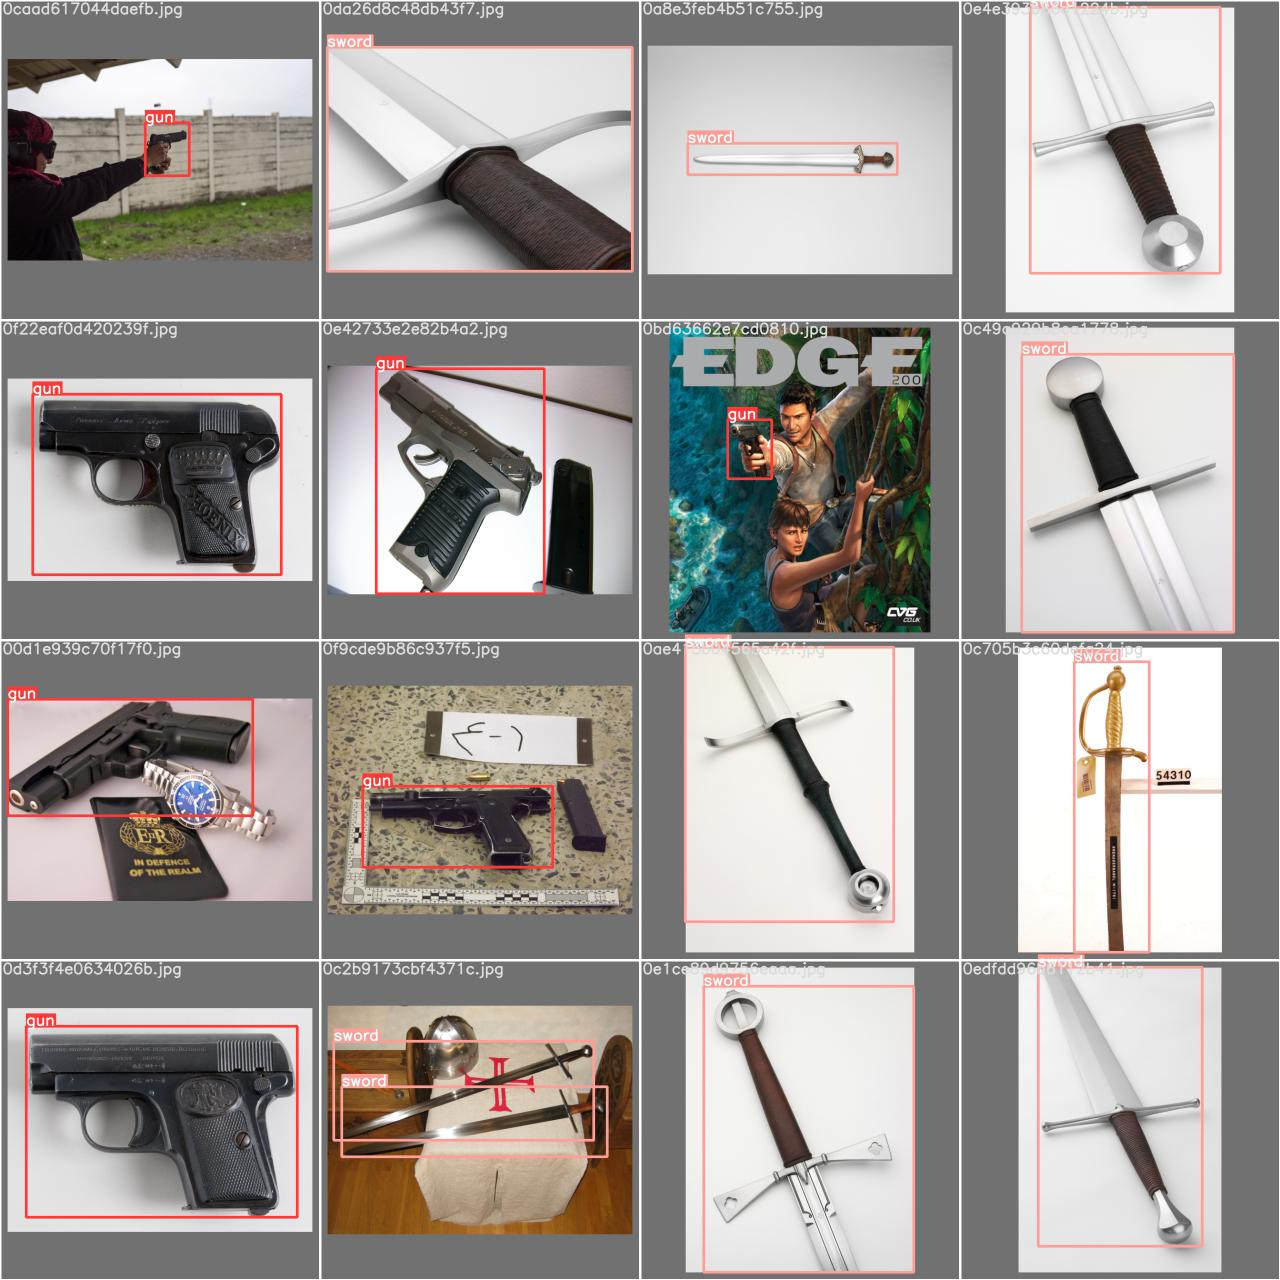

In [9]:
Image(filename='Yolo-wandb-gw-detect/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels

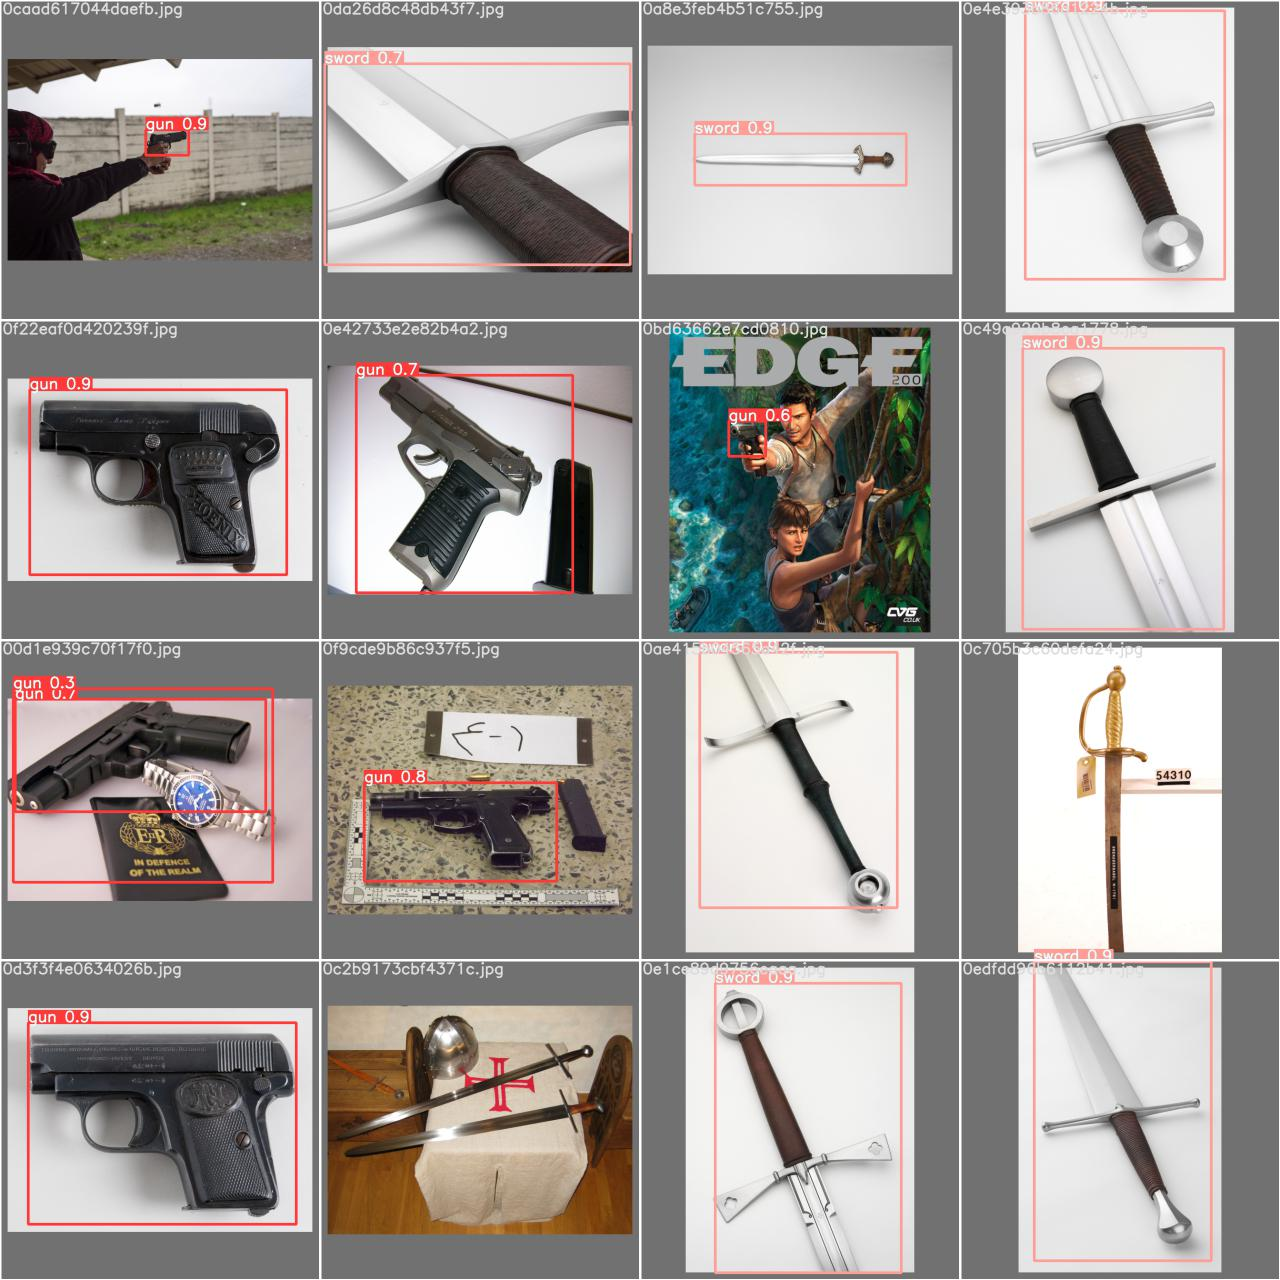

In [10]:
Image(filename='Yolo-wandb-gw-detect/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

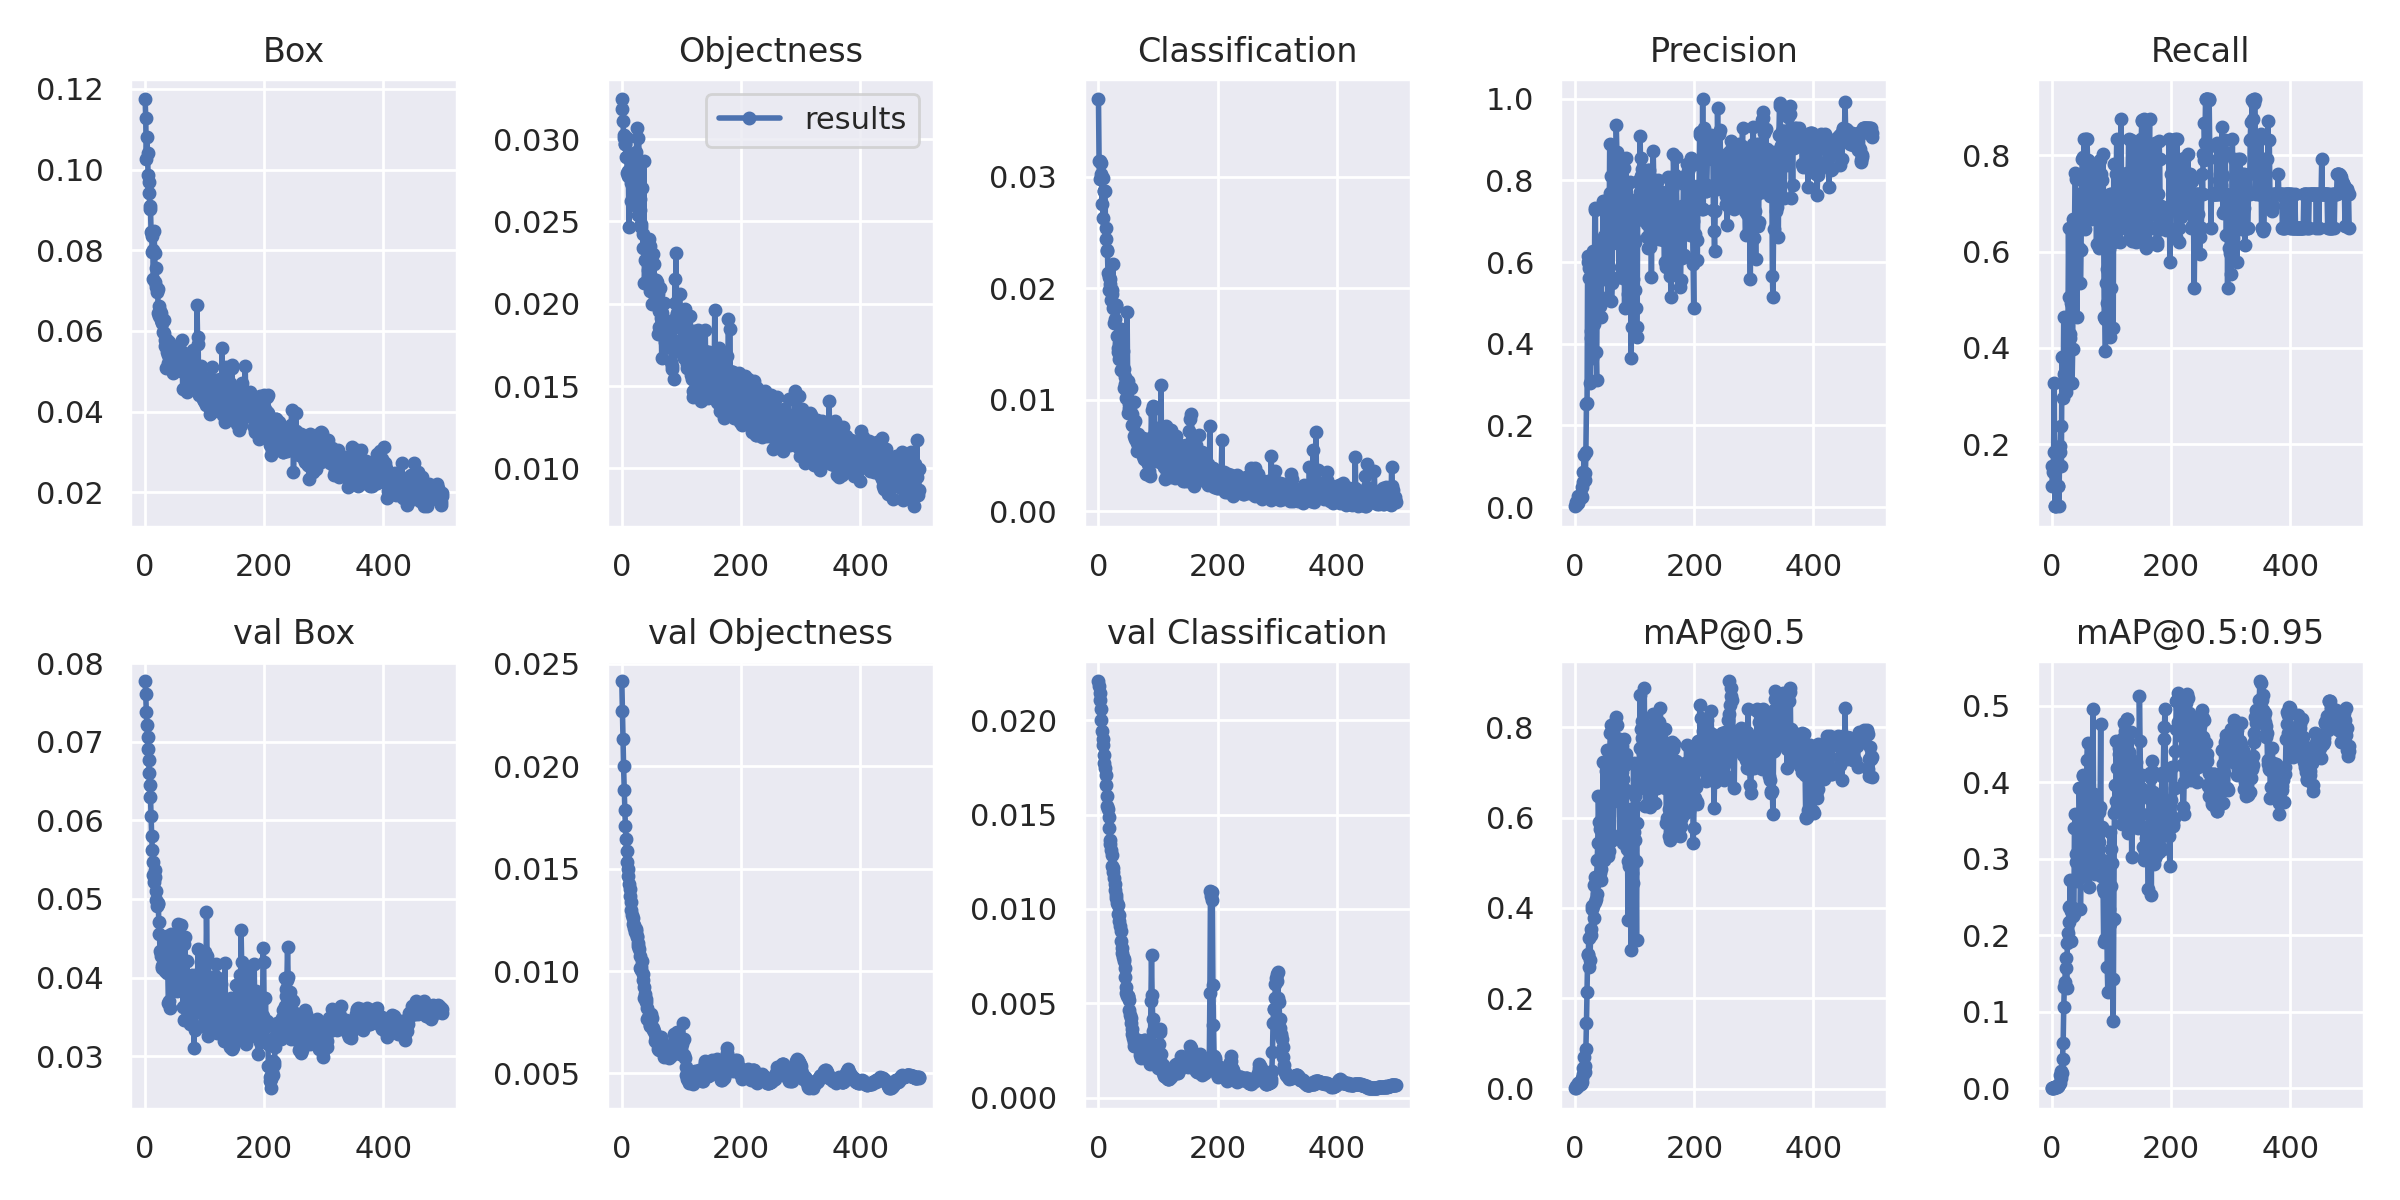

In [12]:
'''
如果要做图的话，可以参考官方colab
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt files in 'runs/train/exp' 
# 'runs/train/exp'为运行文件目录，如果第二次运行，就是存放在exp2，要相应地进行修改
Image(filename='runs/train/exp/results.png', width=800)
'''
#这里wandb已经帮我作图了，直接读取就好
Image(filename='Yolo-wandb-gw-detect/exp/results.png', width=800)

In [13]:
!python detect.py --weights Yolo-wandb-gw-detect/exp/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Yolov5_gw-detct_colab/gw_test_image/fig_sword_01.jpg

detect: weights=['Yolo-wandb-gw-detect/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_gw-detct_colab/gw_test_image/fig_sword_01.jpg, imgsz=416, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7056607 

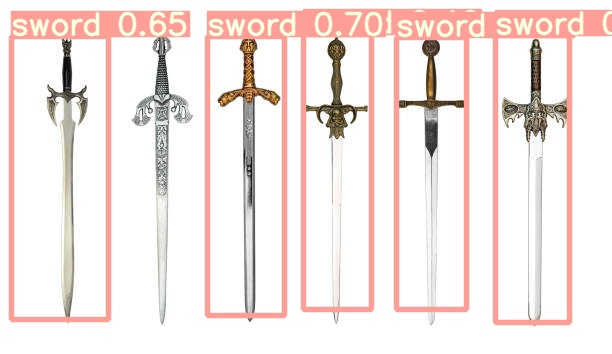

In [14]:
Image(filename='/content/yolov5/runs/detect/exp2/fig_sword_01.jpg',width=900)

In [ ]:
!python detect.py --weights Yolo-wandb-gw-detect/exp/weights/best.pt --img 416 --conf 0.3 --source /content/drive/MyDrive/Yolov5_gw-detct_colab/gw_test_image/fig_sword_01.jpg

In [15]:
#干脆全部检测一遍
!python detect.py --weights Yolo-wandb-gw-detect/exp/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Yolov5_gw-detct_colab/gw_test_image/

detect: weights=['Yolo-wandb-gw-detect/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolov5_gw-detct_colab/gw_test_image/, imgsz=416, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-259-g831773f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7056607 parameters, 0 gr

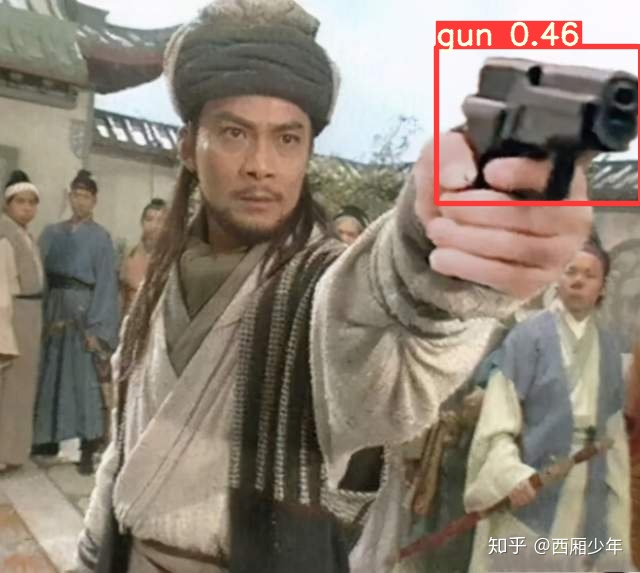

In [16]:
Image(filename='/content/yolov5/runs/detect/exp3/fig_gun_03.jpg',width=900)

>大人，时代变了